<a href="https://www.kaggle.com/code/saidhamedsaidmohamed/flight-fare-prediction?scriptVersionId=195641042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fare-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-dataset/Data_Test.xlsx


# Flight Fare Prediction


## 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn import metrics

## 2. Reading and Cleaning Data

In [5]:
df=pd.read_excel('/kaggle/input/flight-fare-prediction-dataset/Data_Train.xlsx')
test_df=pd.read_excel('/kaggle/input/flight-fare-prediction-dataset/Data_Test.xlsx')

In [6]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4297,Air India,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,21:50,12h 25m,1 stop,No info,8366
1172,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,In-flight meal not included,8147
9283,GoAir,27/06/2019,Banglore,Delhi,BLR → DEL,07:45,10:40,2h 55m,non-stop,No info,3419
1732,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,12:00 25 Mar,17h 5m,1 stop,No info,14231
9131,Jet Airways,9/06/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,8016


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df.shape

(10683, 11)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.duplicated().sum()

220

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

# 3. Exploratory Data Analysis


In [16]:
df_cat=df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']]

In [17]:
df_cat.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
dtype: int64

### -  Airline

In [18]:
df["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### -  Airline & Price              

In [19]:
a_p =df.groupby(['Airline'])['Price'].sum().sort_values(ascending=False)
a_p

Airline
Jet Airways                          42916378
Air India                            16188894
Multiple carriers                    13039603
IndiGo                               11580684
Vistara                               3729048
SpiceJet                              3533711
Air Asia                              1783293
GoAir                                 1137045
Jet Airways Business                   350152
Multiple carriers Premium economy      148445
Vistara Premium economy                 26887
Trujet                                   4140
Name: Price, dtype: int64

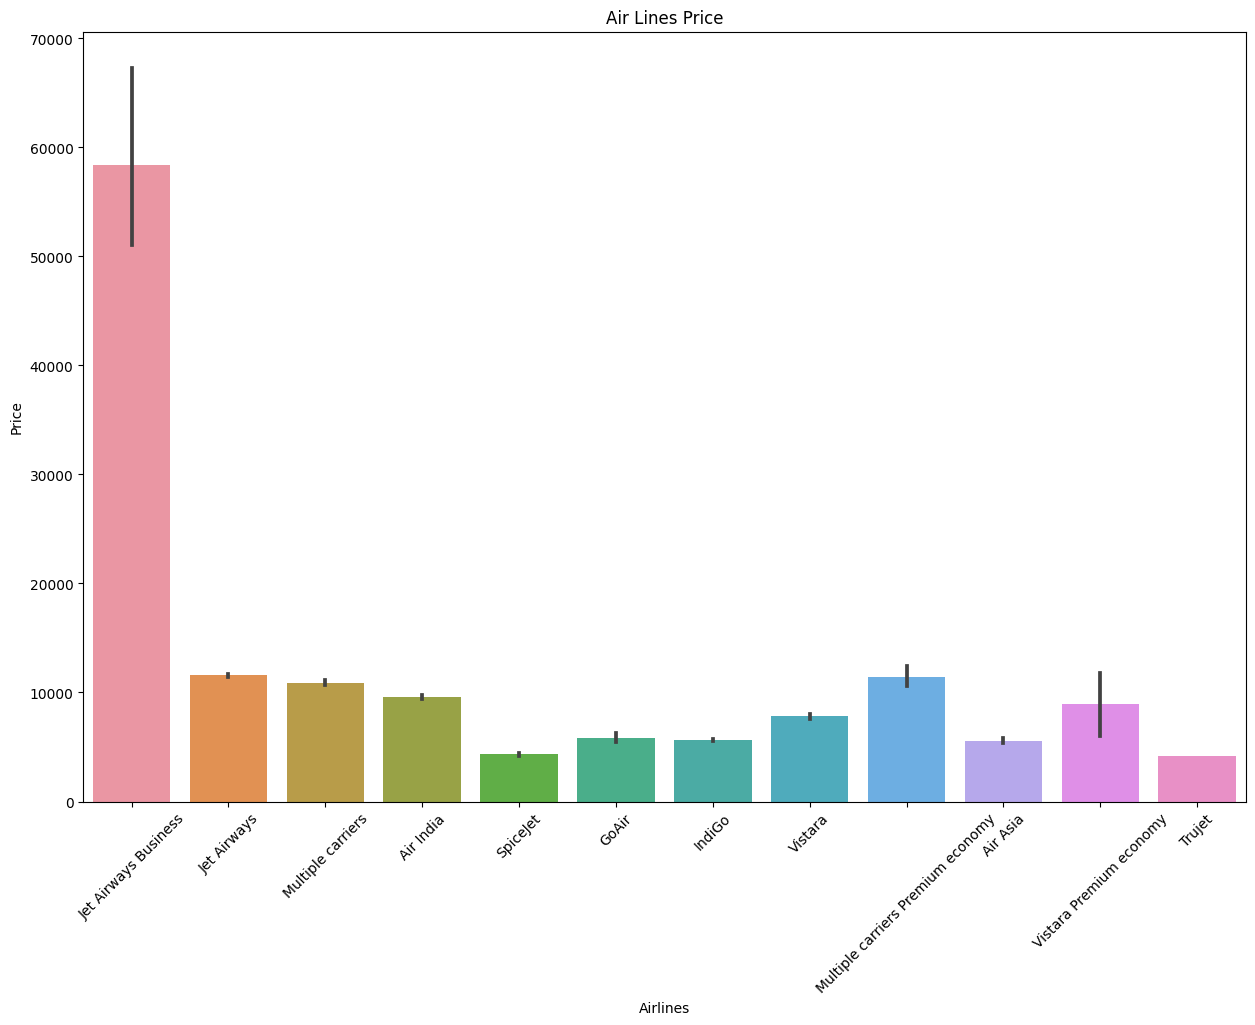

In [20]:
plt.figure(figsize = (15, 10))
sns.barplot(data=df.sort_values('Price',ascending=False), x='Airline', y='Price')
plt.xticks(rotation = 45)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Air Lines Price')

plt.xticks(rotation=45)

plt.show()

### -  Airline flights per stops

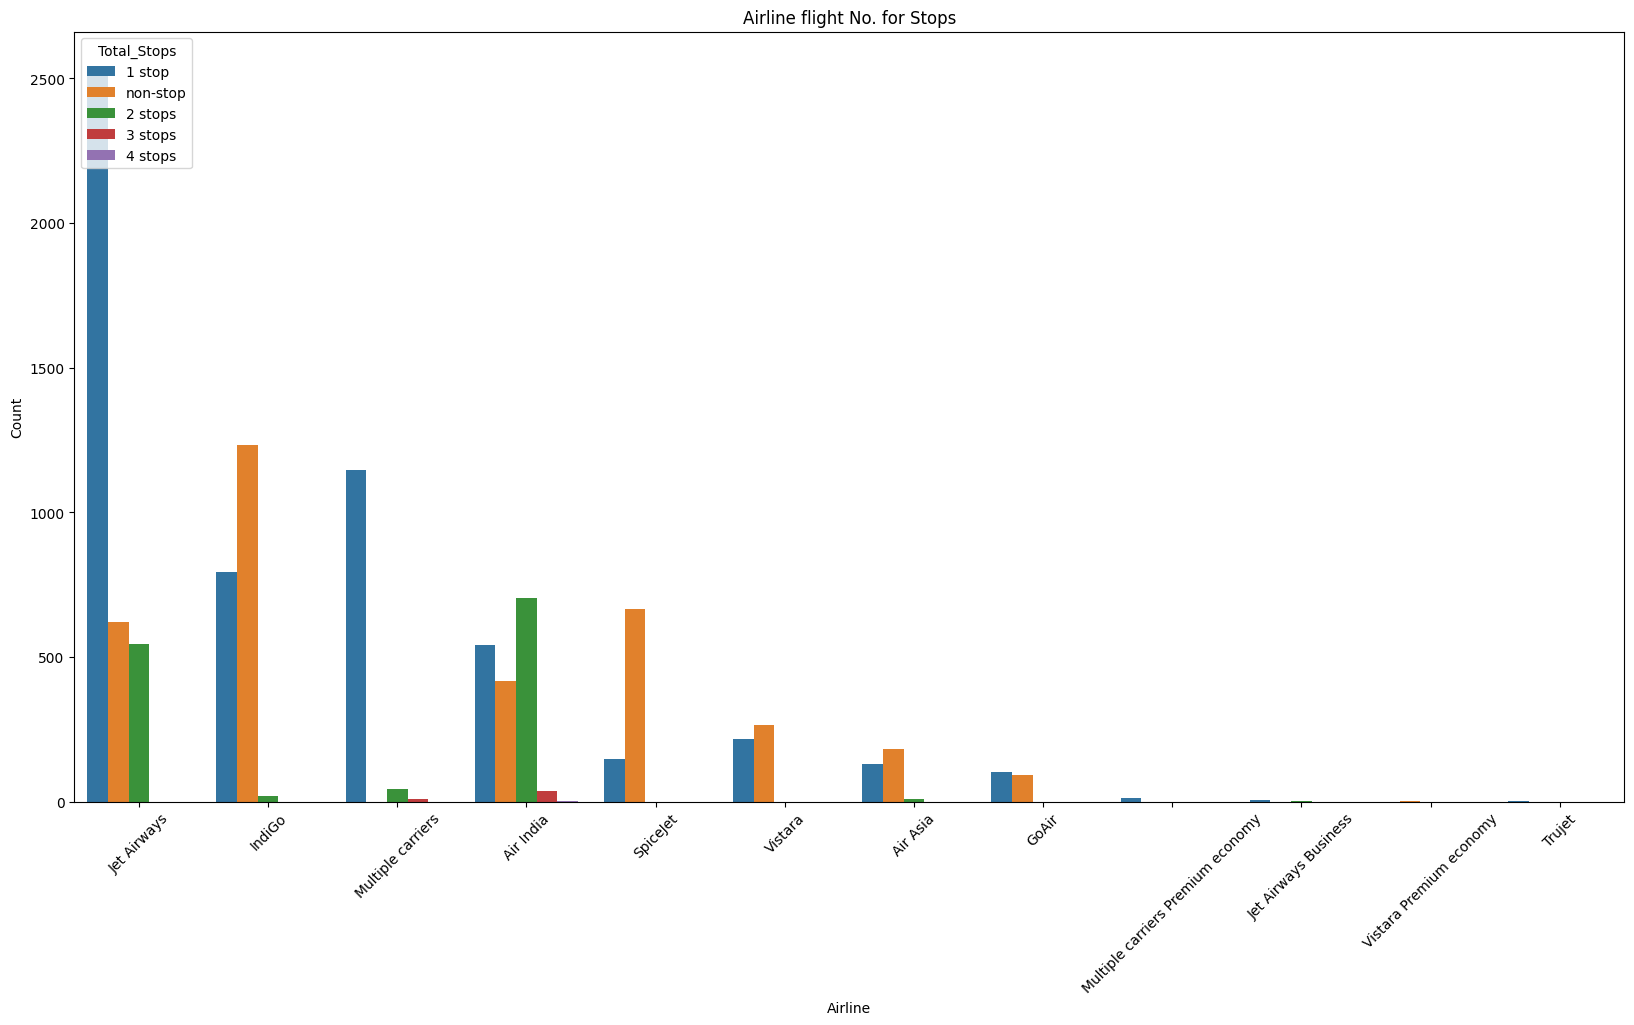

In [21]:
plt.figure(figsize =(20,10))

grouped_counts = df.groupby(['Airline', 'Total_Stops'])\
                .size().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=grouped_counts, x='Airline', y='Count', hue='Total_Stops')

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline flight No. for Stops')

plt.xticks(rotation=45)

plt.show()

### - Total_Stops vs Price


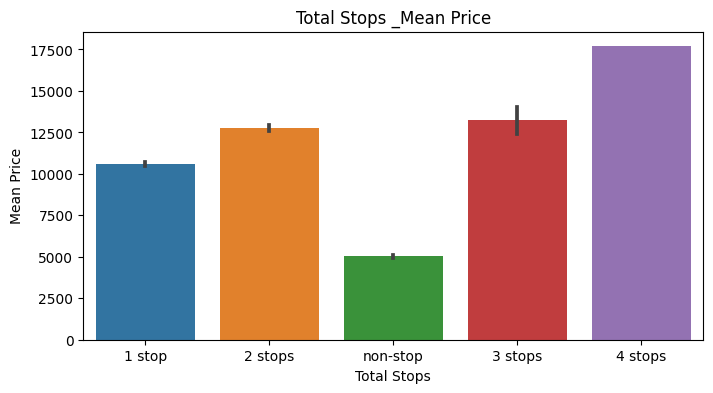

In [22]:
plt.figure(figsize=(8,4))

sns.barplot(data=df.sort_values('Price',ascending=False), x='Total_Stops', y='Price')

plt.xlabel('Total Stops')
plt.ylabel('Mean Price')
plt.title('Total Stops _Mean Price')

plt.show()

### - Additional Info

In [23]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

### - Additional_Info vs Price

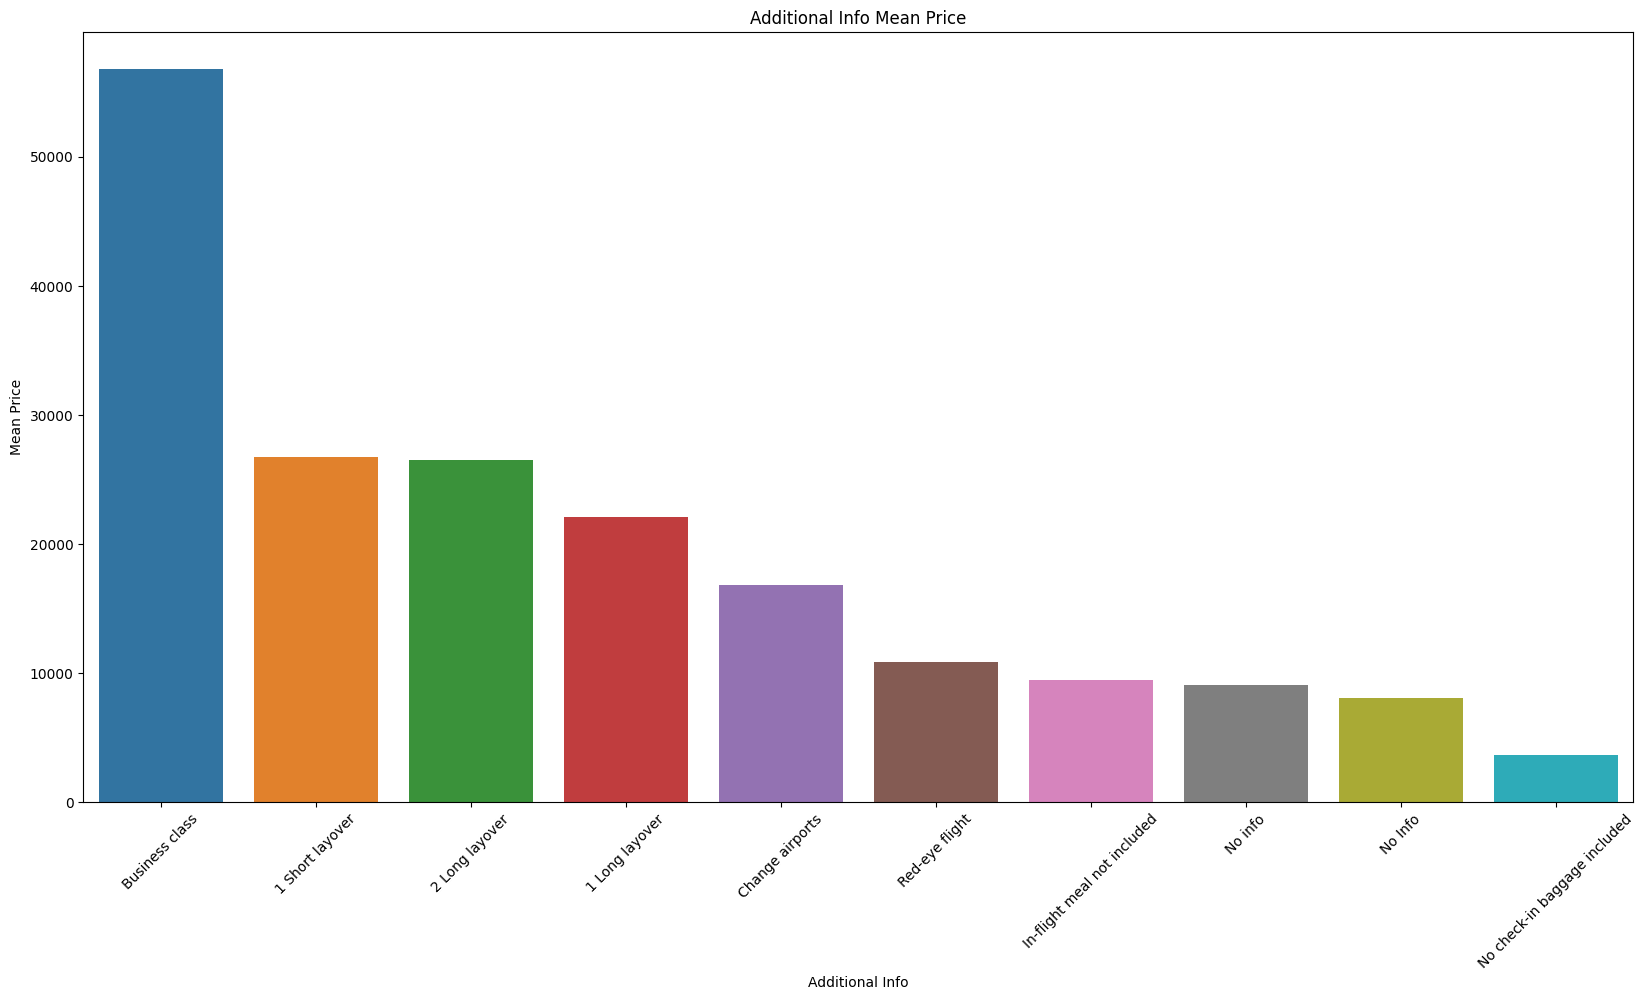

In [24]:
plt.figure(figsize=(20,10))

sorted_df = df.groupby('Additional_Info')['Price'].mean()\
.sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_df, x='Additional_Info', y='Price')

plt.xlabel('Additional Info')
plt.ylabel('Mean Price')
plt.title('Additional Info Mean Price')

plt.xticks(rotation=45)

plt.show()

### - Source

In [25]:
df.Source.value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

### - Source vs price

In [26]:
s_p = df.groupby(['Source'])['Price'].sum().sort_values(ascending=False)
s_p

Source
Delhi       45455655
Kolkata     26149219
Banglore    17481840
Mumbai       3526617
Chennai      1824949
Name: Price, dtype: int64

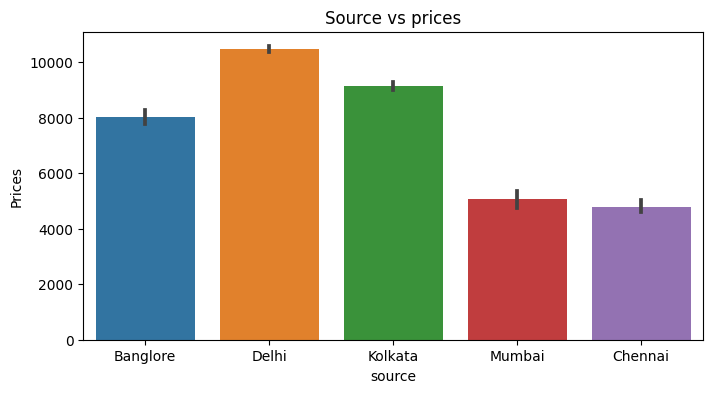

In [27]:
plt.figure(figsize=(8,4))

sns.barplot(data=df.sort_values('Price',ascending=False), x='Source', y='Price')

plt.xlabel('source')
plt.ylabel('Prices')
plt.title('Source vs prices')

plt.show()

### - Day, Month, Year

In [28]:
df[['Day', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True)

In [29]:
df['Day'].value_counts()

Day
9     1275
6     1173
27    1092
21    1085
24    1022
15     967
12     946
1      907
18     814
3      743
01     151
09     100
06      95
03      92
Name: count, dtype: int64

In [30]:
df['Day'] = df['Day'].str.replace('0', '')

In [31]:
df['Day'].unique()


array(['24', '1', '9', '12', '27', '18', '3', '15', '6', '21'],
      dtype=object)

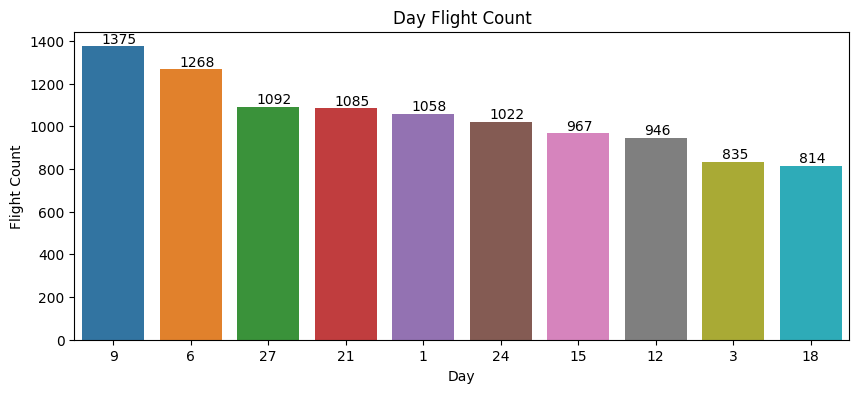

In [32]:
plt.figure(figsize=(10, 4))
sorted_df = df['Day'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Day', order=sorted_df.index)


plt.xlabel('Day')
plt.ylabel('Flight Count')
plt.title('Day Flight Count')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')


plt.show()

In [33]:
df['Month'].value_counts()

Month
05    3395
06    3311
03    2678
04    1078
Name: count, dtype: int64

In [34]:
df['Month'] = df['Month'].str.replace('0', '')

In [35]:
df['Month'].unique()

array(['3', '5', '6', '4'], dtype=object)

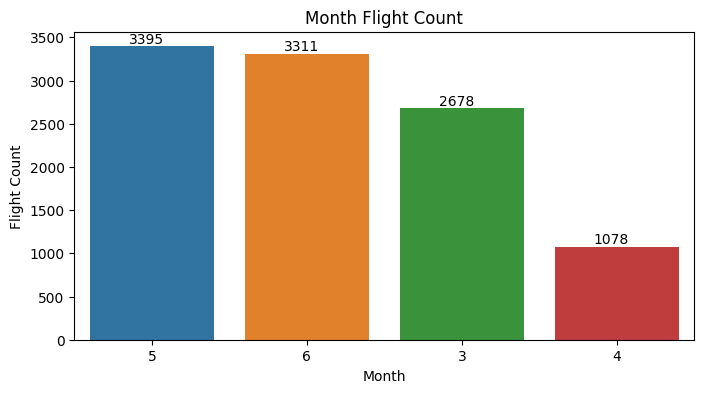

In [36]:
plt.figure(figsize=(8, 4))
sorted_df = df['Month'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Month', order=sorted_df.index)

plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Month Flight Count')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

plt.show()

In [37]:
df['Year'].value_counts()

Year
2019    10462
Name: count, dtype: int64

# - Save data

In [38]:
df.to_csv('cleaned_df.csv')

 # 4- Dropping Unimportant Columns 

In [39]:
df = df.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Year'], axis=1)

In [40]:
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

In [41]:
df.head(5)

,Dep_Time,Duration,Total_Stops,Price,Day,Month
0,22:20,2h 50m,non-stop,3897,24,3
1,05:50,7h 25m,2 stops,7662,1,5
2,09:25,19h,2 stops,13882,9,6
3,18:05,5h 25m,1 stop,6218,12,5
4,16:50,4h 45m,1 stop,13302,1,3


In [42]:
df["Total_Stops"].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
df["Total_Stops"]=df["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})

In [44]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [45]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]

duration_hour=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [46]:
df['Duration_Hr']=duration_hour
df['Duration_min']=duration_mins

In [47]:
df.drop(['Duration'],axis=1,inplace=True)
df.head()

,Dep_Time,Total_Stops,Price,Day,Month,Duration_Hr,Duration_min
0,22:20,0,3897,24,3,2,50
1,05:50,2,7662,1,5,7,25
2,09:25,2,13882,9,6,19,0
3,18:05,1,6218,12,5,5,25
4,16:50,1,13302,1,3,4,45


In [48]:
df['Dep_Hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_mins']=pd.to_datetime(df['Dep_Time']).dt.minute

In [49]:
df.drop(['Dep_Time'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Day,Month,Duration_Hr,Duration_min,Dep_Hr,Dep_mins
0,0,3897,24,3,2,50,22,20
1,2,7662,1,5,7,25,5,50
2,2,13882,9,6,19,0,9,25
3,1,6218,12,5,5,25,18,5
4,1,13302,1,3,4,45,16,50


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total_Stops   10462 non-null  int64 
 1   Price         10462 non-null  int64 
 2   Day           10462 non-null  object
 3   Month         10462 non-null  object
 4   Duration_Hr   10462 non-null  int64 
 5   Duration_min  10462 non-null  int64 
 6   Dep_Hr        10462 non-null  int32 
 7   Dep_mins      10462 non-null  int32 
dtypes: int32(2), int64(4), object(2)
memory usage: 653.9+ KB


In [51]:
co=df.corr()

<Axes: >

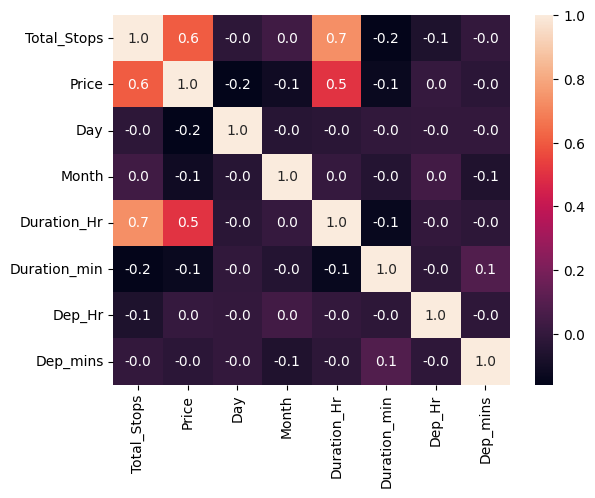

In [52]:
sns.heatmap(co,annot=True,fmt=".1f")

# TEST DATA

In [53]:
test_data=pd.read_excel('/kaggle/input/flight-fare-prediction-dataset/Data_Test.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
test_data.shape

(2671, 10)

In [55]:
test_data.describe().T

,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [57]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
test_data.duplicated().sum()

26

In [59]:
test_data.drop_duplicates(inplace=True)

In [60]:
test_data.duplicated().sum()

0

In [61]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [62]:
test_data[['Day', 'Month', 'Year']] = test_data['Date_of_Journey'].str.split('/', expand=True)

In [63]:
test_data['Day'] = test_data['Day'].str.replace('0', '')

In [64]:
test_data['Month'] = test_data['Month'].str.replace('0', '')

In [65]:
test_data = test_data.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Year'], axis=1)

In [66]:
test_data = test_data.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

In [67]:
test_data["Total_Stops"].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [68]:
test_data["Total_Stops"]=test_data["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})

In [69]:
test_data.head()

,Dep_Time,Duration,Total_Stops,Day,Month
0,17:30,10h 55m,1,6,6
1,06:20,4h,1,12,5
2,19:15,23h 45m,1,21,5
3,08:00,13h,1,21,5
4,23:55,2h 50m,0,24,6


In [70]:
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]

duration_hour=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [71]:
test_data['Duration_Hr']=duration_hour
test_data['Duration_min']=duration_mins

In [72]:
test_data.drop(['Duration'],axis=1,inplace=True)
test_data.head()

,Dep_Time,Total_Stops,Day,Month,Duration_Hr,Duration_min
0,17:30,1,6,6,10,55
1,06:20,1,12,5,4,0
2,19:15,1,21,5,23,45
3,08:00,1,21,5,13,0
4,23:55,0,24,6,2,50


In [73]:
test_data['Dep_Hr']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_mins']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [74]:
test_data.drop(['Dep_Time'],axis=1,inplace=True)
test_data.head()

,Total_Stops,Day,Month,Duration_Hr,Duration_min,Dep_Hr,Dep_mins
0,1,6,6,10,55,17,30
1,1,12,5,4,0,6,20
2,1,21,5,23,45,19,15
3,1,21,5,13,0,8,0
4,0,24,6,2,50,23,55


In [75]:
test_data.head()

,Total_Stops,Day,Month,Duration_Hr,Duration_min,Dep_Hr,Dep_mins
0,1,6,6,10,55,17,30
1,1,12,5,4,0,6,20
2,1,21,5,23,45,19,15
3,1,21,5,13,0,8,0
4,0,24,6,2,50,23,55


In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total_Stops   2645 non-null   int64 
 1   Day           2645 non-null   object
 2   Month         2645 non-null   object
 3   Duration_Hr   2645 non-null   int64 
 4   Duration_min  2645 non-null   int64 
 5   Dep_Hr        2645 non-null   int32 
 6   Dep_mins      2645 non-null   int32 
dtypes: int32(2), int64(3), object(2)
memory usage: 144.6+ KB


In [77]:
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [78]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [79]:
print(model.feature_importances_)

[0.29622281 0.14724046 0.08920302 0.21907071 0.07048734 0.09711076
 0.0806649 ]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8369, 7)
(2093, 7)


In [81]:
LinearRegression=LinearRegression()
LinearRegression.fit(X_train,y_train)
y_pred=LinearRegression.predict(X_test)
r2_score(y_test,y_pred)

0.4309942323690297

In [82]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.714651955368413

In [83]:
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [84]:
y_pred=model.predict(X_test)

In [85]:
model.score(X_test,y_test)

0.679331841722379

In [86]:
model.score(X_train,y_train)

0.963616410743609

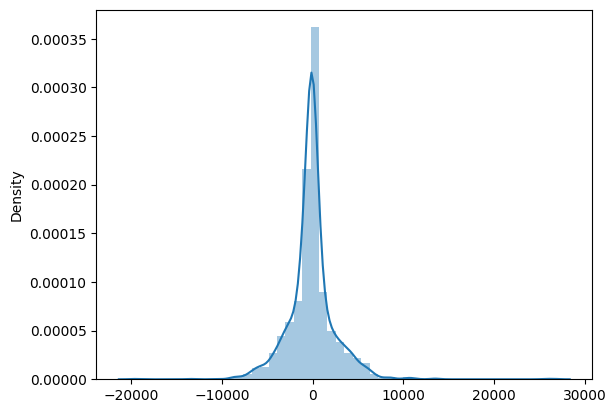

In [87]:
sns.distplot(y_test-y_pred)
plt.show()

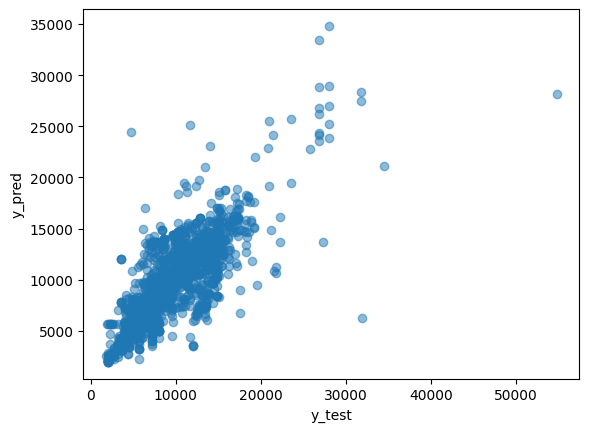

In [88]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1592.329618569836
MSE: 6686019.725683122
RMSE: 2585.733885318271


In [90]:
2090.5509/(max(y)-min(y))

0.026887077025966846

In [91]:
metrics.r2_score(y_test, y_pred)

0.679331841722379

## thank you